#### Global initialization of libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller

#### Loading the dataset

In [3]:
attrition_data = pd.read_csv(r'D:\Downloads\attrition_data.csv')
attrition_data.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12
Year,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Attrition Rate,10,11,12,13,15,17,18,20,22,23,25,27,28


#### Generating the 'Augmented Dickey-Fuller' test result

In [5]:
series = attrition_data['Attrition Rate']
result = adfuller(series, autolag='AIC')

In [6]:
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -0.2146071357327699
p-value: 0.9367579401732326
Critial Values:
   1%, -4.6651863281249994
Critial Values:
   5%, -3.3671868750000002
Critial Values:
   10%, -2.802960625


#### Insights from the ADF test

In [8]:
if result[1] >= 0.05:
    print('P-value of', result[1], 'is greater than/equal to 0.05\nNull hypothesis: failed to reject\nSeries: non stationary')
else:
    print('P-value of', result[1], 'is lesser than 0.05\nNull hypothesis: rejected\nSeries: stationary')

P-value of 0.9367579401732326 is greater than/equal to 0.05
Null hypothesis: failed to reject
Series: non stationary


#### Visual representation

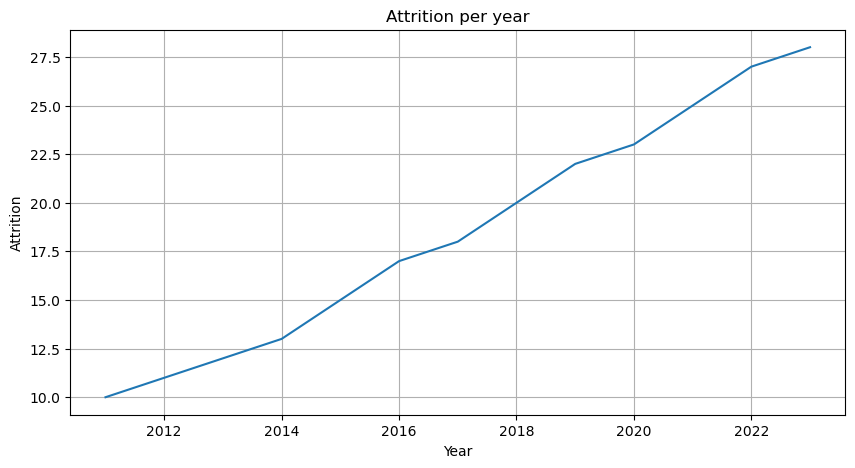

In [15]:
fig, axes = plt.subplots(figsize=(10,5))
plt.plot(attrition_data['Year'], attrition_data['Attrition Rate'])
plt.title('Attrition per year')
plt.xlabel('Year')
plt.ylabel('Attrition')
plt.grid(True)